In [11]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller  # Change this line

/var/folders/4w/bz0c67ws21z5nn4r3pwkhddc0000gn/T/ipykernel_32263/2176406707.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])  # Assuming there's a Date column
/var/folders/4w/bz0c67ws21z5nn4r3pwkhddc0000gn/T/ipykernel_32263/2176406707.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])  # Assuming there's a Date column
/var/folders/4w/bz0c67ws21z5nn4r3pwkhddc0000

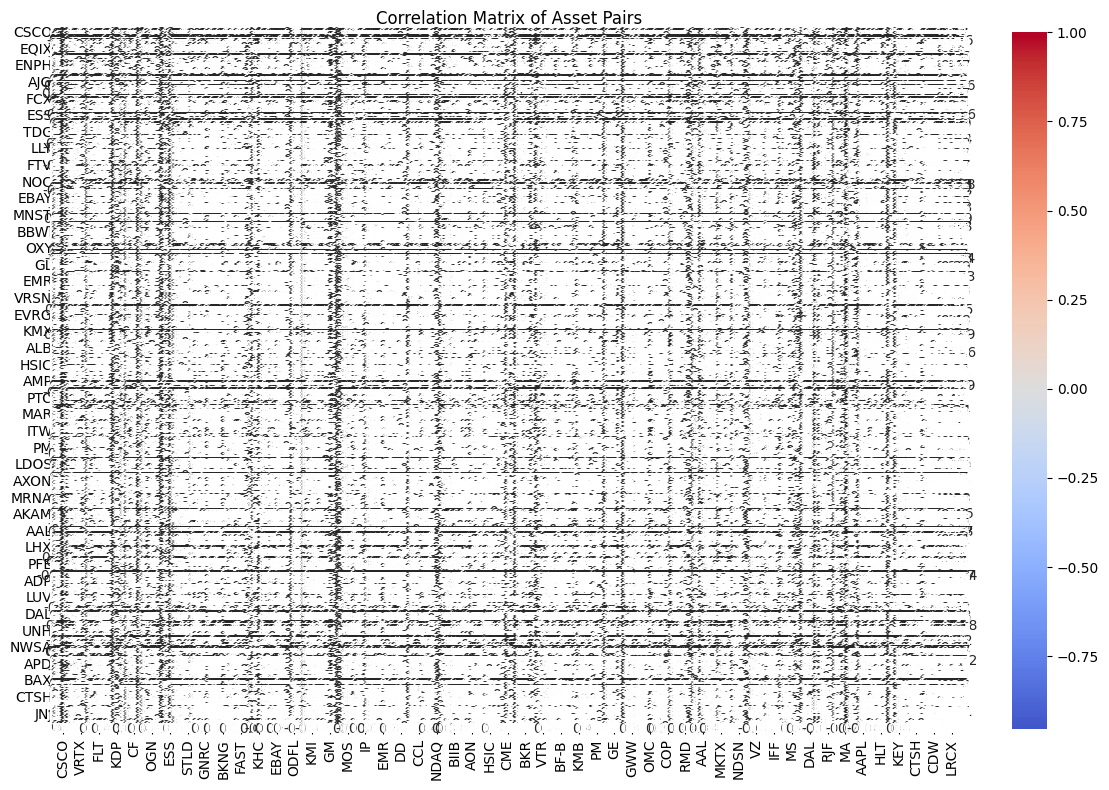

In [5]:
# Function to load and prepare data from CSV files
def load_ticker_data(archive_path):
    dfs = {}
    for file in os.listdir(archive_path):
        if file.endswith('.csv'):
            ticker = file.split('.')[0]  # Get ticker name from filename
            df = pd.read_csv(os.path.join(archive_path, file))
            df['Date'] = pd.to_datetime(df['Date'])  # Assuming there's a Date column
            df.set_index('Date', inplace=True)
            dfs[ticker] = df['Close']  # We'll use closing prices for correlation
    return pd.DataFrame(dfs)

# Load all ticker data
archive_path = 'archive'  # Update this path
price_data = load_ticker_data(archive_path)

# Calculate correlation matrix
correlation_matrix = price_data.corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Asset Pairs')
plt.tight_layout()
plt.show()

In [17]:
# Find highly correlated pairs
def find_pairs(correlation_matrix, threshold=0.9):
    pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > threshold:
                pairs.append({
                    'asset1': correlation_matrix.columns[i],
                    'asset2': correlation_matrix.columns[j],
                    'correlation': corr
                })
    return pd.DataFrame(pairs)

# Get highly correlated pairs
correlated_pairs = find_pairs(correlation_matrix)
print("\nHighly correlated pairs:")
print(correlated_pairs)


Highly correlated pairs:
      asset1 asset2  correlation
0       CSCO   ISRG     0.901137
1       CSCO     CE     0.940842
2       CSCO   EQIX     0.935706
3       CSCO      V     0.968236
4       CSCO    FLT     0.903374
...      ...    ...          ...
42581    WAT   LRCX     0.913366
42582    WAT    BLK     0.976748
42583    IEX   LRCX     0.934169
42584    IEX    BLK     0.980885
42585   LRCX    BLK     0.935770

[42586 rows x 3 columns]


In [12]:
def analyze_pair(price_data, asset1, asset2):
    # Calculate price ratio
    ratio = price_data[asset1] / price_data[asset2]
    
    # Perform Augmented Dickey-Fuller test for cointegration
    adf_result = adfuller(ratio)  # Now using the correct function
    
    return {
        'ratio_mean': ratio.mean(),
        'ratio_std': ratio.std(),
        'adf_statistic': adf_result[0],
        'adf_pvalue': adf_result[1]
    }

In [18]:
# Save correlated pairs to CSV
correlated_pairs.to_csv('correlated_pairs.csv', index=False)

In [19]:
print('hello')

hello
